In [42]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import sklearn

In [43]:
data_path='./Data/employee_retention.csv'
data=pd.read_csv(data_path)
data.sample(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
6797,462729.0,5,customer_service,6,59000.0,2011-03-07,2013-04-12
6051,71314.0,1,customer_service,1,29000.0,2015-11-16,NaN
20566,349634.0,10,customer_service,3,23000.0,2012-07-02,2015-08-07


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [45]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [46]:
data['join_date']=pd.to_datetime(data.join_date)

In [47]:
data['quit_date']=pd.to_datetime(data.quit_date)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [49]:
data.sort_values(by='quit_date')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24518,751615.0,6,customer_service,6,63000.0,2011-01-31,2011-10-13
8465,972130.0,10,marketing,20,147000.0,2011-02-22,2011-10-14
15523,581263.0,1,sales,5,118000.0,2011-01-24,2011-10-21
15602,135834.0,4,engineer,16,169000.0,2011-02-07,2011-10-28
3777,71407.0,1,customer_service,19,107000.0,2011-01-25,2011-11-11
...,...,...,...,...,...,...,...
24691,965573.0,6,data_science,6,159000.0,2012-09-27,NaT
24693,366356.0,9,data_science,10,173000.0,2014-09-11,NaT
24694,236400.0,1,customer_service,8,70000.0,2015-07-20,NaT
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT


In [50]:
for col in data.columns:
    uniques=sorted(data[col].unique())
    # print('{0:20s}{1:5d}\t'.format(col,len(uniques)),uniques[:5])
    print(col,len(uniques),uniques[:5])

employee_id 24702 [36.0, 70.0, 107.0, 155.0, 157.0]
company_id 12 [1, 2, 3, 4, 5]
dept 6 ['customer_service', 'data_science', 'design', 'engineer', 'marketing']
seniority 31 [1, 2, 3, 4, 5]
salary 367 [17000.0, 18000.0, 19000.0, 20000.0, 21000.0]
join_date 995 [numpy.datetime64('2011-01-24T00:00:00.000000000'), numpy.datetime64('2011-01-25T00:00:00.000000000'), numpy.datetime64('2011-01-26T00:00:00.000000000'), numpy.datetime64('2011-01-31T00:00:00.000000000'), numpy.datetime64('2011-02-01T00:00:00.000000000')]
quit_date 665 [numpy.datetime64('2011-10-13T00:00:00.000000000'), numpy.datetime64('2011-12-23T00:00:00.000000000'), numpy.datetime64('2012-01-03T00:00:00.000000000'), numpy.datetime64('2012-03-02T00:00:00.000000000'), numpy.datetime64('2012-07-27T00:00:00.000000000')]


In [51]:
company_id_li=data['company_id'].unique()
company_id_li

array([ 7,  4,  2,  9,  1,  6, 10,  5,  3,  8, 11, 12])

In [52]:
type(company_id_li)
len(company_id_li)

12

In [53]:
unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(data['company_id'].unique())

In [54]:
len(unique_date)

1785

In [55]:
# Define useful information
unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(data['company_id'].unique())

day = []
company = []
headcount = []

# Loop through date and company id
for date in unique_date[:10]:
    for idx in unique_company[:2]:
        total_join = len(data[(data['join_date'] <= date) & (data['company_id'] == idx)])
        total_quit = len(data[(data['quit_date'] <= date) & (data['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)

# Create table for day, employee_headcount, company_id
table = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount}, 
                     columns=['day', 'company_id', 'employee_headcount'])

In [56]:
table

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-25,1,27
3,2011-01-25,2,19
4,2011-01-26,1,29
5,2011-01-26,2,19
6,2011-01-27,1,29
7,2011-01-27,2,19
8,2011-01-28,1,29
9,2011-01-28,2,19


# Data Exploratory Analysis

In [57]:
data.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT


In [58]:
# 分类统计各个公司有多少人quit?
data.groupby('company_id').count()

,employee_id,dept,seniority,salary,join_date,quit_date
company_id,,,,,,
1,8486,8486,8486,8486,8486,4621
2,4222,4222,4222,4222,4222,2206
3,2749,2749,2749,2749,2749,1531
4,2062,2062,2062,2062,2062,1153
5,1755,1755,1755,1755,1755,983
6,1291,1291,1291,1291,1291,712
7,1224,1224,1224,1224,1224,692
8,1047,1047,1047,1047,1047,579
9,961,961,961,961,961,529


In [59]:
company_data_overall=data['company_id'].value_counts()
# company_data_overall.sort_values()
company_data_overall_dic= {'company_id':company_data_overall.index,'overall_num':company_data_overall.values}
company_data_overall=pd.DataFrame(company_data_overall_dic)
company_data_overall.sort_values(by='company_id')
company_data_overall

,company_id,overall_num
0,1,8486
1,2,4222
2,3,2749
3,4,2062
4,5,1755
5,6,1291
6,7,1224
7,8,1047
8,9,961
9,10,865


In [60]:
stay_data=data[~data['quit_date'].isnull()]
stay_count=stay_data['company_id'].value_counts()
stay_count_dic= {'company_id':stay_count.index,'stay_num':stay_count.values}
stay_data=pd.DataFrame(stay_count_dic)
stay_data.sort_values(by='company_id')
stay_data

,company_id,stay_num
0,1,4621
1,2,2206
2,3,1531
3,4,1153
4,5,983
5,6,712
6,7,692
7,8,579
8,9,529
9,10,480


In [61]:
quit_data=data[data['quit_date'].isnull()]
quit_count=quit_data['company_id'].value_counts()
quit_count_dic= {'company_id':quit_count.index,'quit_num':quit_count.values}
quit_data=pd.DataFrame(quit_count_dic)
quit_data.sort_values(by='company_id')
quit_data

,company_id,quit_num
0,1,3865
1,2,2016
2,3,1218
3,4,909
4,5,772
5,6,579
6,7,532
7,8,468
8,9,432
9,10,385


In [62]:
company_table=pd.DataFrame()
company_table['company_id']=quit_data['company_id']
company_table['quit_num']=quit_data['quit_num']
company_table['stay_num']=stay_data['stay_num']
company_table['overall_num']=company_data_overall['overall_num']
company_table

,company_id,quit_num,stay_num,overall_num
0,1,3865,4621,8486
1,2,2016,2206,4222
2,3,1218,1531,2749
3,4,909,1153,2062
4,5,772,983,1755
5,6,579,712,1291
6,7,532,692,1224
7,8,468,579,1047
8,9,432,529,961
9,10,385,480,865


In [63]:
company_table['stay_frac']=company_table['stay_num']/company_table['overall_num']
company_table['quit_frac']=company_table['quit_num']/company_table['overall_num']
company_table

,company_id,quit_num,stay_num,overall_num,stay_frac,quit_frac
0,1,3865,4621,8486,0.544544,0.455456
1,2,2016,2206,4222,0.522501,0.477499
2,3,1218,1531,2749,0.556930,0.443070
3,4,909,1153,2062,0.559166,0.440834
4,5,772,983,1755,0.560114,0.439886
5,6,579,712,1291,0.551510,0.448490
6,7,532,692,1224,0.565359,0.434641
7,8,468,579,1047,0.553009,0.446991
8,9,432,529,961,0.550468,0.449532
9,10,385,480,865,0.554913,0.445087


# Seaborn 可视化学习

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##  inline表示将图表嵌入到Notebook中。

In [65]:
## 输出图形


# 各个公司seaborn 频率直方图

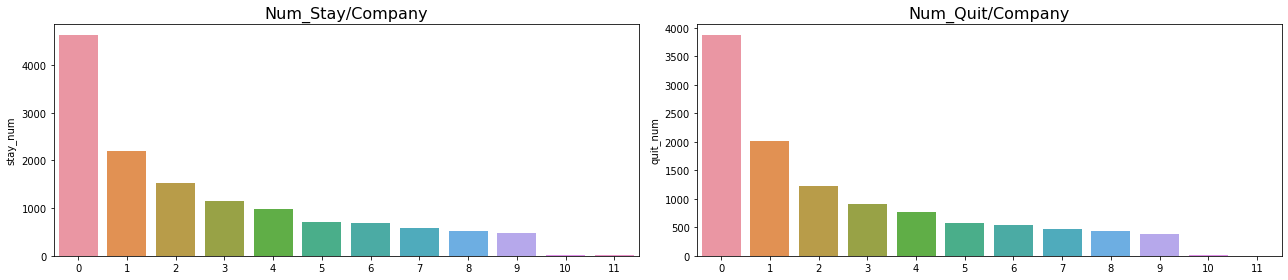

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.barplot(x=company_table.index,y=company_table.stay_num, ax=ax[0])
ax[0].set_title('Num_Stay/Company', fontsize=16)
# ax[0].set_yscale('log')
sns.barplot(x=company_table.index,y=company_table.quit_num, ax=ax[1])
ax[1].set_title('Num_Quit/Company', fontsize=16)
plt.tight_layout()
plt.show()

In [68]:
company_table.to_csv('./seaborn_prac.csv')

将index 设置为一列

In [ ]:
# 下面这个复杂度可太高了
# # 原来是可以通过list组成DateFrame的
# day=[]
# comp=[]
# hc=[]
# for date in unique_date:
#     for idx in unique_company:
#         company_data=data[data.company_id==idx]# 选出中间表
#         people_in_num=len(company_data[company_data['join_date']<=date])
#         people_out_num=len(company_data[company_data['quit_date']<=date])
#         num=people_in_num-people_out_num
#         day.append(date)
#         comp.append(comp)
#         hc.append(num)

# # pandas建立表格说实话我也不会
# table=pd.DataFrame({'date':day,'company_id':comp,'employee_num':hc},
# columns=['date','company_id','employee_num'])

# #pandas是可以通过list建立表格的


In [ ]:
# table

In [ ]:
# table.to_csv('3-midTable.csv')